# Data Vizualization
## Hranush Sahradyan
## EDA on Melburne Housing Dataset

###### Assignment 1
Our goal is to perform exploratory data analysis (EDA) on <a href=https://github.com/Metricam/Public_data/blob/master/World_Bank.csv>this</a> dataset. As mentioned in address below data is well cleaned, so data is read for data analysis via vizualisations. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D. etc.

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

Fist let's read our data as pandas data frame the do metadt exploration.

In [10]:
df = pd.read_csv('melb_data.csv')

In [11]:
df.shape

(13580, 21)

In [12]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<b>Notes on Specific Variables</b> <br><br>

<b>Rooms:</b> Number of rooms

<b>Price:</b> Price in dollars

<b>Method:</b> S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

<b>Type: </b>br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

<b>SellerG:</b> Real Estate Agent

<b>Date:</b> Date sold

<b>Distance:</b> Distance from CBD

<b>Regionname:</b> General Region (West, North West, North, North east …etc)

<b>Propertycount:</b> Number of properties that exist in the suburb.

<b>Bedroom2:</b> Scraped # of Bedrooms (from different source)

<b>Bathroom:</b> Number of Bathrooms

<b>Car:</b> Number of carspots

<b>Landsize:</b> Land Size

<b>BuildingArea:</b> Building Size

<b>CouncilArea:</b> Governing council for the area

Along with house indicators such as the number of rooms, etc., the price of the house and the date of sale seems the most interesting variables.

In [16]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Here is a plot to understand missing values.

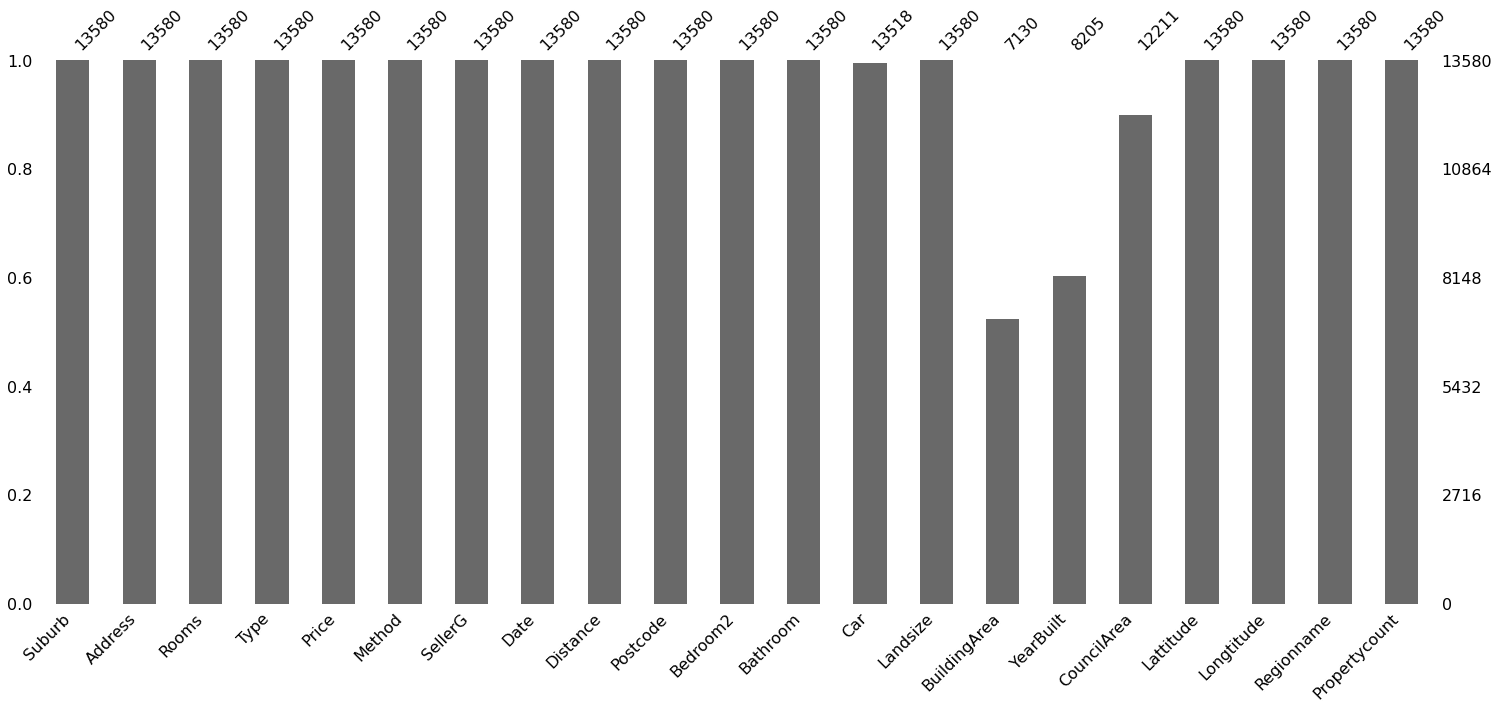

In [23]:
missingno.bar(df)
plt.show()

There are some valuable variables that contain significantly many missing values like building area.

In [24]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [18]:
df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Lattitude','Longtitude','Propertycount']].describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,-37.408530,145.526350,21650.000000


Now let's see some histograms to describe our numerical variables.

In [29]:
num_cols = df.dtypes[df.dtypes != "O"].index.tolist()
num_cols=['Rooms',
 'Price',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude']

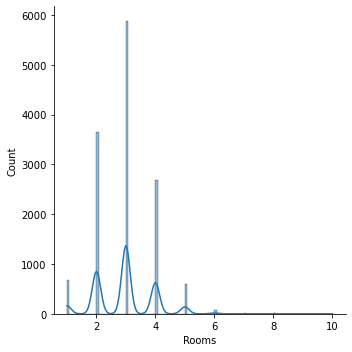

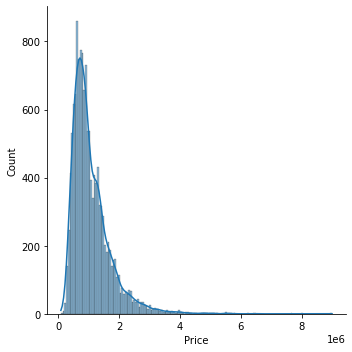

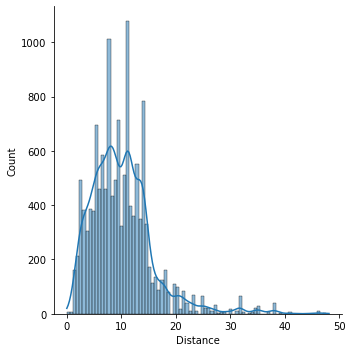

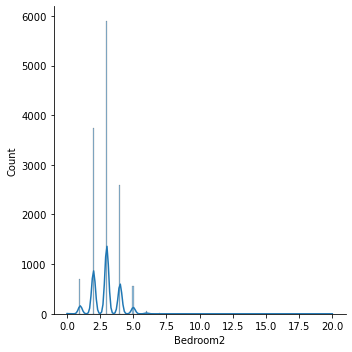

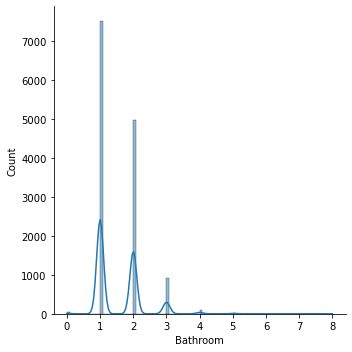

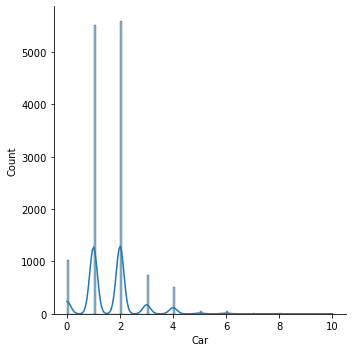

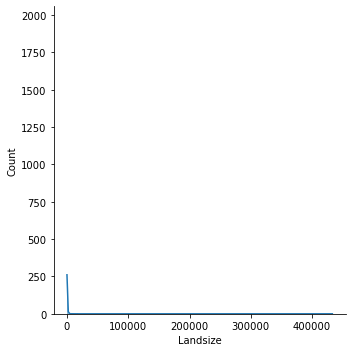

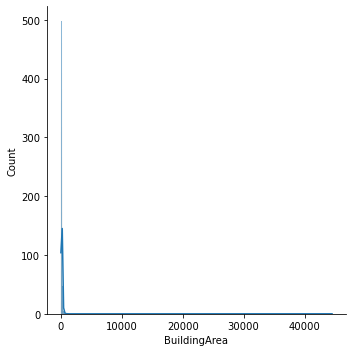

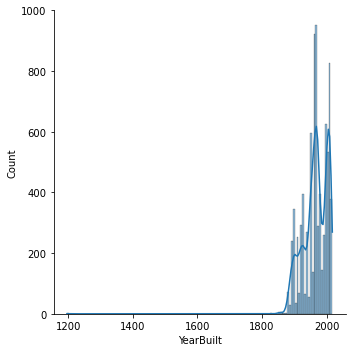

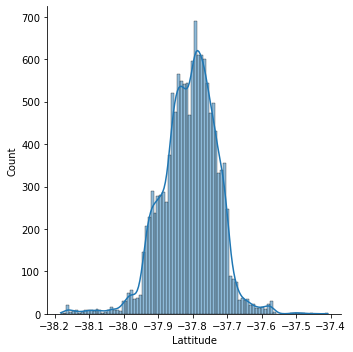

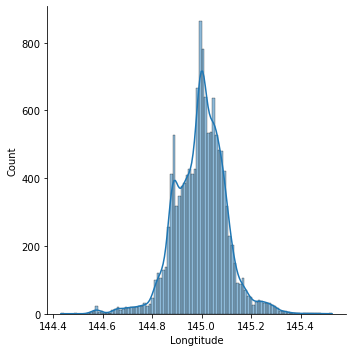

In [30]:
for num_col in num_cols:
    sns.displot(df[num_col], kde=True)
    plt.show()

In [36]:
unique_methods = np.unique(", ".join(df['Method'].values).split(", "))
dict_ = {}
for method in unique_methods:
    dict_[method] = df[df.Method == method]['Price'].mean()
avg_df = pd.DataFrame({"Method":dict_.keys(), 'Avg_values': dict_.values()})
avg_df = avg_df.sort_values(by = 'Avg_values', ascending=False)
global_mean = df.Price.mean()

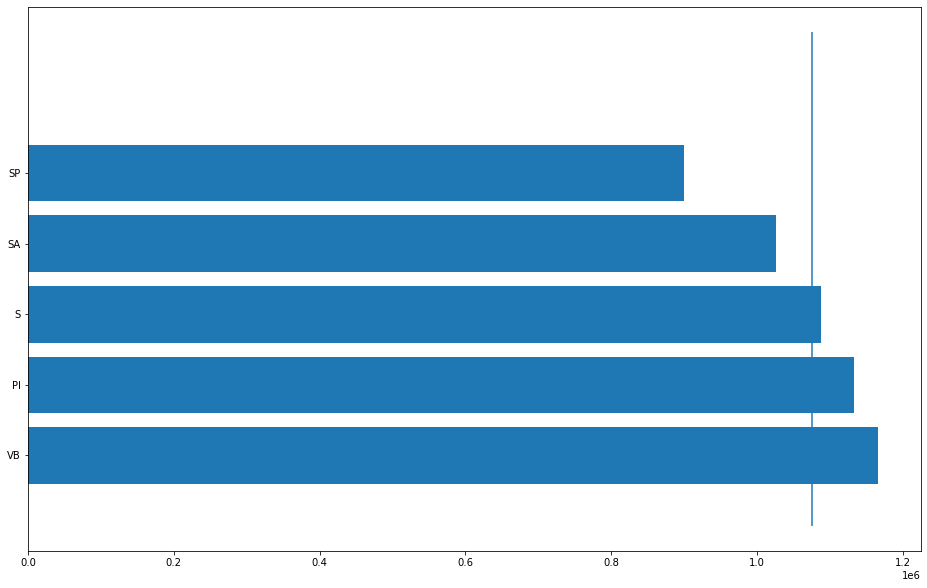

In [37]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=avg_df.Method, width=avg_df.Avg_values)
ax.vlines(global_mean,  ymin=-1, ymax=avg_df.shape[0]+1)
# plt.yticks(rotation=90)

plt.show()